# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [84]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [85]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [86]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Q1. Is the distribution of body temperatures normal?

We can determine if the distribution of body temperatures are normal through vizualization and using a normal distribution test. 

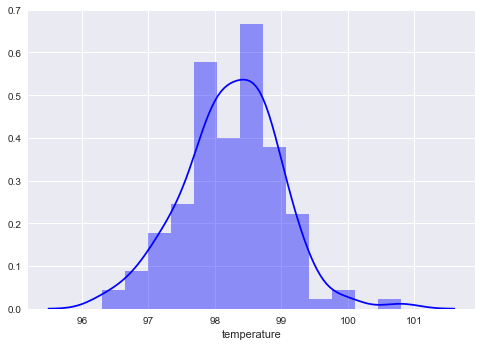

In [87]:
# Plotting a distribution plot to test for symmetry
temp = df['temperature']
sns.distplot(temp, color='blue')
plt.show()

In [88]:
# Test for normality on the distribution of body temperatures

stats.mstats.normaltest(temp, axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value is a probability that measures the evidence against the null hypothesis. Lower probabilities provide stronger evidence against the null hypothesis.  To determine whether the data does not follow a normal distribution, compare the p-value to the significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that the data does not follow a normal distribution when they actually do follow a normal distribution. 

P-value ≤ α: The data do not follow a normal distribution (Reject H0)
P-value > α : Cannot conclude the data do not follow a normal distribution (Fail to reject H0)

In the normal test result, the p-value is 0.259, which is greater than the significance level of 0.05. We cannot reject the null hypothesis: the body temperature is normally distributed.

H0: μ = 98.6°F (average body temperature is 98.6)

Ha: μ ≠ 98.6°F (average body temperature is not 98.6)

In [89]:
p=0.2587479863488254
alpha=0.05
if p < alpha:  # null hypothesis: the body temperatures comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis cannot be rejected


Q2. Is the sample size large? 

10% Condition: When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population.

In general a sample size of 30 is considered sufficient if the sample is unimodal (and meets the 10% condition).Since, this is the case with our dataset, 130 is a large enough sample size.

In [90]:
# Sample size
len(df)

130

Are the observations independent?

Does body temperature depend on heart rate? If it does, then the observations are dependent. We can test if the two variables are independent of each other by calculating Pearson Correlation. Before calculating a Pearson Correlation, we should first use a scatter plot to establish if the data indicates a linear relationship.

From the scatter plot below, the data points do not seem to show a linear relationship between temperature and heart rate, however, there could possibly be a linear relationship.  Based on the value for r, there is a weak correlation between body temperature and heart rate.

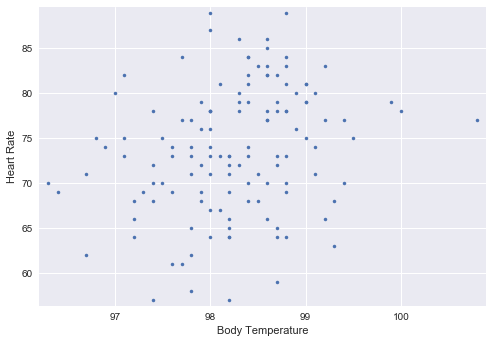

r= 0.253656402721


In [91]:
rate=df['heart_rate']

# Plot body temperature vs heart rate
_ = plt.plot(temp, rate, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Heart Rate')

# Show the plot
plt.show()

# Calculating a Pearson Correlation Coefficient
def pearson_r(x,y):
    # Compute a correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient which measures the degree to which a relationship conforms to a straight line

r = pearson_r(temp, rate)
print('r= ' + str(r))

Correlation Conclusion: There is no correlation between body temperature and heart rate(r = 0.25), which may be claimed because the correlation coefficient is significant (p-value = 0.00359) 

The value of correlation is numerically shown by a coefficient of correlation, most often by Pearson’s coefficient, while the significance of the coefficient is expressed by P-value. 

In [92]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
stats.pearsonr(temp, rate)

(0.25365640272076417, 0.003591489250708233)

Q3. Is the true population mean really 98.6 degrees F?

We will use a one sample t-test to see if there is a significant difference between the population mean (98.6°F) and the sample mean (98.25°F). This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations, temp, is equal to the given population mean, popmean. 

In the one sample t-test result below, we have a p-vale of 0.000000241. Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence.

In [93]:
popmean = 98.6
stats.ttest_1samp(temp, popmean, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Q4. Draw a small sample of size 10 from the data and repeat test.
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the  t and z statistic?

We can do this through Bootstrapping (rasampling an array)

In [94]:
bs_sample = np.random.choice(temp, size=10)

print('Mean = ' + str(np.mean(bs_sample)))
print('Median = ' + str(np.median(bs_sample)))
print('Standard Deviation= ' + str(np.std(bs_sample)))

sample_mean= 98.06
stats.ttest_1samp(temp, sample_mean, axis=0)

Mean = 98.45
Median = 98.45
Standard Deviation= 0.283725219182


Ttest_1sampResult(statistic=2.9427336182488122, pvalue=0.0038586543002238098)

Standard Error of Mean = 0.0640566146952
Standard Deviation of Bootstrap Replicates = 0.0643614400764


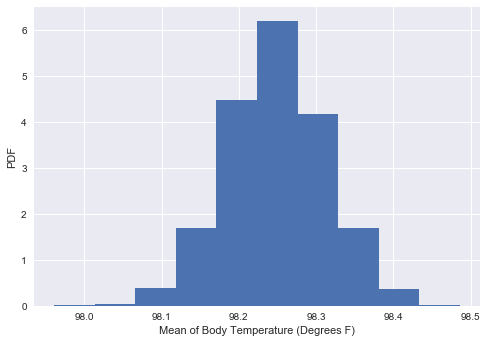

In [95]:
# Boostrap replicate function
def draw_bs_reps(data, func, size=1):
    """Draw boostrap replicates."""
    
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i]= bootstrap_replicate_1d(temp, np.mean)
        
    return bs_replicates

# Take 10000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

# Compute and print Standard Error of Mean (SEM)
sem = np.std(temp)/np.sqrt(len(temp))
print('Standard Error of Mean = ' + str(sem))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Standard Deviation of Bootstrap Replicates = ' + str(bs_std))

# Plotting a histogram of boostrap replicates
_ = plt.hist(bs_replicates, normed=True)
_ = plt.xlabel('Mean of Body Temperature (Degrees F)')
_ = plt.ylabel('PDF')
plt.show()

I notice that the SEM and standard deviation of bootstrap replicates is the same and the distribution of the boostrap replicates of the mean is normal.

 Q5. At what temperature should we consider someone's temperature to be "abnormal"?

In [96]:
#Compute the 95% Confidence Interval
Conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(Conf_int)

[ 98.12151923  98.37615385]


We are 95% confident that the human body temperature is between 98.12 to 98.38°F 
Anything outside this range is considered to be an "abnormal" body temperature.

Q6. Is there a significant difference between males and females in normal temperature?

We can use a two sample t-test to determine if there is a difference between male and female normal tempertures. 

H0: There is no difference between male and female normal temperatures

Ha: There is significant different between male and female normal temperatures

There is a slight difference between the mean temperatures of males and females in the sample. Is this difference statistically significant? We use a 2-sample t-test and get a t-statistic, t= 2.29 with a p-value of 0.024.  Sine 0.024 < 0.05, we reject the null hypothesis of equal body temperatures.

In [97]:
# Find the mean of female and male temperatures 
female_temp = df.temperature[df.gender == "F"]
male_temp = df.temperature[df.gender == "M"]
mean_female_temp = np.mean(female_temp)
mean_male_temp = np.mean(male_temp)
print('Average female body temperature = ' + str(mean_female_temp))
print('Average male body temperature = ' + str(mean_male_temp))

# Compute independent t-test 
stats.ttest_ind(female_temp, male_temp, axis=0)

Average female body temperature = 98.39384615384613
Average male body temperature = 98.1046153846154


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

Summary and conclusion:  

For many years we have accepted the average human body temperature to be 98.6°F. To see if the true population mean is in fact 98.6°F we examine the measured body temperatures of n=130 adults (half male and half female), along with his or her heart rate. Through descriptive statistics we found the average temperature from the sample to be 98.25°F with a standard deviation of 0.73°F. We want to determine if the data contradicts the hypothesis that the average body temperature is 98.6°F. The alternative hypothesis, denoted Ha, is set up to represent our goal: μ ≠ 98.6°F (average body temperature is not 98.6°F). 

Since many statistical tests rely on the normality of a sample or population, it is often useful to test whether the underlying distribution is normal, or at least symmetrical. We use the p-value to determine whether the data does not follow a normal distribution. After visualizing our data, we use a normal distribution test and received a p-value of 0.259. Since 0.259 > 0.05, we fail to reject the null hypothesis because there is not enough evidence to conclude that our data does not follow a normal distribution which is greater than the significance level of 0.05. We must also test if the temperatures and heart rate are independent of each other. We can test if the two variables are independent of each other by calculating Pearson Correlation. We can also visualize the correlation through a scatter plot. The correlation coefficient, r= 0.25, shows a weak correlation. We conclude there is no correlation between body temperature and heart rate, which may be claimed because the correlation coefficient is significant (p-value= 0.00359).

Provided that our data are from a normal distribution and are independent of each other, we use a one sample (two-sided) t-test to compare the observed sample mean(98.25°F) to the hypothesized value(98.6°F). The test statistic 
t= -5.45 and p-value= 0.000000241. Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence. There is only a 5% probability of incorrectly rejecting the null hypothesis. We conclude that the average body temperature differs from 98.6°F. 

We can repeat the same test over and over by computing a boostrap replicate. To start, we resample the data and choose a sample size of 10. With the resampled data, we can compute the mean, median, and standard deviation. Mean = 98.28, Median = 98.25, Standard Deviation= 0.389358446679. Compared to the original data, the mean differs by 0.03, the median differs by 0.05, and the standard deviation differs by 0.34. Let's see the difference when we increase the sample size to 10,000. After taking 10,000 bootstrap replicates of the mean, I computed the Standard Error of the Mean (SEM) and Standard deviation of the boostrap replicates. I found that the standard deviation of the 10,000 means is 0.064, which is also the same value for the bootstrapped SEM(0.064). The histogram of boostrap replicates also shows the mean is normally distributed.

We can use NumPy percentile function to find the confidence interval of 10,000 boostrap replicates of the mean. The 95% CI= [ 98.12151923  98.37615385], which means we are 95% confident that the mean body temperature for ALL people is between 98.12 and 98.38°F. The assumed normal body temperature of 98.6°F is not within the 95% confidence interval for the mean.

To dive deeper into analysis, we can test to see if there is a significant difference between male and female normal temperatures. First we can take the mean of the 65 males and 65 females. The average male temperature is 98.105°F and the average female temperature is 98.394°F. There is a small difference between the two, but is this statistically significant?

We can use a two sample t-test to determine if there is a difference between male and female normal tempertures. 

H0: There is no difference between male and female normal temperatures
Ha: There is significant different between male and female normal temperatures

The p-value from the t-test is equal to 0.024. Since 0.024 < 0.05, we reject the null hypothesis that there is no difference betweeen male and female tempertaures.  We are 95% confident that there is a significant different between male and female normal temperatures. On average, women have a higher body temperature than men.  